In [54]:
import os
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

In [109]:
def draw_dist(base_dir, name):
    object_dict = {}
    for path in os.listdir(base_dir):
         if 'FloorPlan' in path:
            action = np.loadtxt(f'{base_dir}/{path}/action.txt', dtype='str', delimiter='\t')
            objects = action[:, 0]
            for obj in objects:
                obj = obj.split(' ')[1]
                if obj not in object_dict:
                    object_dict[obj] = 1
                else:
                    object_dict[obj] += 1
    df = pd.DataFrame({'type': list(object_dict.keys()), 'number': list(object_dict.values())})
    df = df[df['number'] > 10]
    ax = sns.barplot(x="number", y="type", data=df,  orient = 'h')
    ax.set_title(name, fontsize=12)
    ax.set_xlabel("# of Interactions",fontsize=12)
    ax.set_ylabel("Object Type",fontsize=12)
    ax.tick_params(labelsize=10)

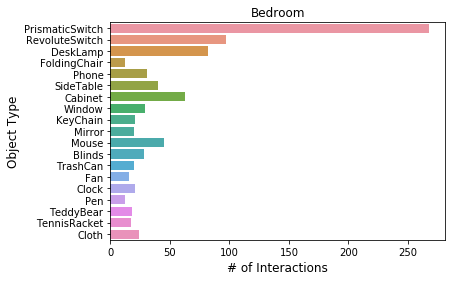

In [110]:
draw_dist('bedroom', 'Bedroom')

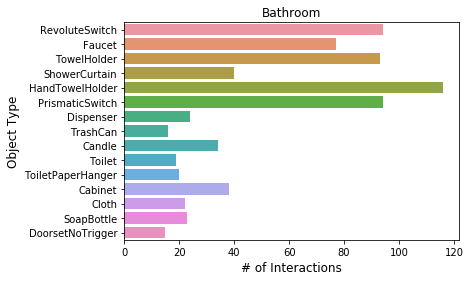

In [111]:
draw_dist('bathroom', 'Bathroom')

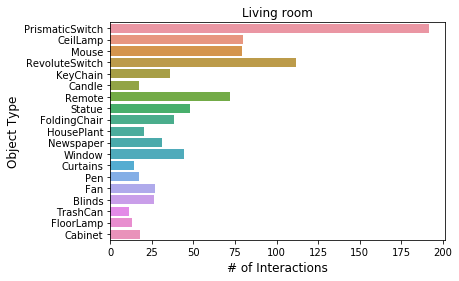

In [112]:
draw_dist('living_room', 'Living room')

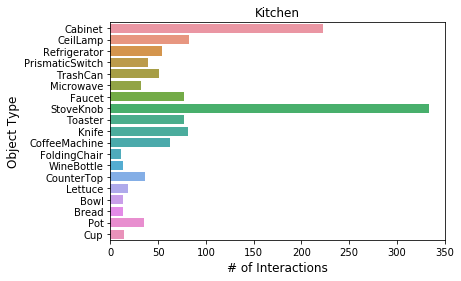

In [114]:
draw_dist('kitchen', 'Kitchen')

In [13]:
def load_stat(base_dir):
    total_performance = np.zeros((100, 3))
    total_counter = np.zeros((100, 3))
    for path in os.listdir(base_dir):
        if 'FloorPlan' in path:
            performance = np.loadtxt(f'{base_dir}/{path}/performance.txt')
            total_performance[:performance.shape[0]] += performance
            total_counter[:performance.shape[0]] += 1
    mask_P = total_counter[:, 0] > 0
    mask_R = total_counter[:, 1] > 0
    mask_F1 = total_counter[:, 2] > 0
    
    P = total_performance[mask_P, 0] / total_counter[mask_P, 0]
    R = total_performance[mask_R, 1] / total_counter[mask_R, 1]
    F1 = total_performance[mask_F1, 2] / total_counter[mask_F1, 2]
    return P, R, F1

In [16]:
P, R, F1 = load_stat('kitchen')
# Pb, Rb, F1b = load_stat('kitchen_binary')

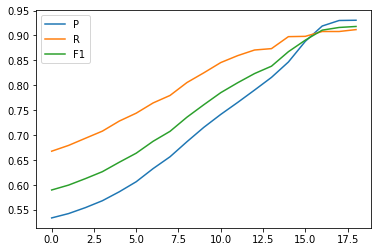

In [15]:
plt.plot(P)
plt.plot(R)
plt.plot(F1)

plt.legend(['P', 'R', 'F1'])

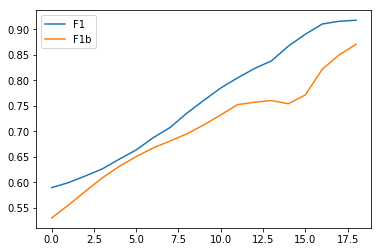

In [17]:
plt.plot(F1)
plt.plot(F1b)

plt.legend(['F1', 'F1b'])

In [117]:
P_bathroom, R_bathroom, F1_bathroom = load_stat('bathroom')
P_bedroom, R_bedroom, F1_bedroom = load_stat('bedroom')
P_living_room, R_living_room, F1_living_room = load_stat('living_room')
P_kitchen, R_kitchen, F1_kitchen = load_stat('kitchen')

Text(0,0.5,'F1')

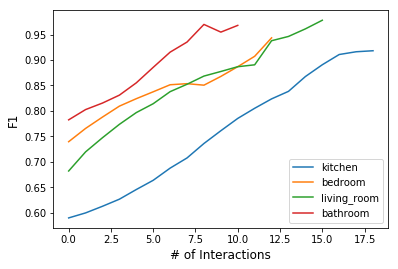

In [125]:
plt.plot(F1_kitchen)
plt.plot(F1_bedroom)
plt.plot(F1_living_room)
ax = plt.plot(F1_bathroom)

plt.legend(['kitchen', 'bedroom', 'living_room', 'bathroom'])
plt.xlabel("# of Interactions",fontsize=12)
plt.ylabel("F1",fontsize=12)
# ax.tick_params(labelsize=10)